# Guía 1
## Ejercicio 1

**Modelamos el ojo como un sistema lente-sensor. Podemos simplificar nuestro modelo asumiendo que el “sensor” está compuesto por los conos, con una densidad constante de 150000 elementos por mm^2, y posee un área de 1.5mm x 1.5mm.**

**Suponiendo que dejamos de ver algo cuando el área de la imagen del objeto se hace menor que el tamaño de un cono del sensor, calcular el tamaño del menor punto visible sobre una pantalla de LCD de un celular que se encuentra a 30 cm de nuestros ojos. Comparar este resultado con el tamaño de los pixeles en los teléfonos modernos.**


Modelamos el ojo como sistema lente-sensor de la siguiente manera:

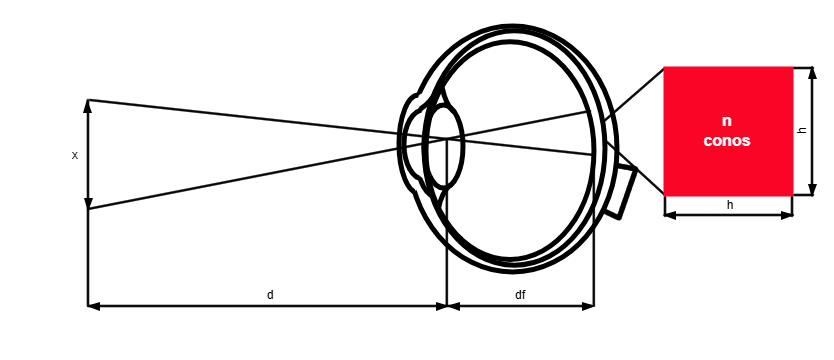

donde:
* h = 1.5 mm
* d = 30 cm = 300 mm
* df = [14 mm, 17 mm]

**La cantidad de nodos n la obtenemos:**

n = densidad \* h \* h

n = 150000 conos/mm^2 \* 1.5 mm \* 1.5 mm

n = 337000 conos

\
**Por lo que la cantidad de conos de un lado h será:**

n_h = n^(1/2)

n_h = 580.95 conos

=> tomamos n_h = 581 conos

\
**El lado h' de cada cono nos queda:**

h' = h / n_h

h' = 1.5 mm / 581 conos

h' = 0.002582 mm

\
**Luego, como la pantalla LCD del celular está a d = 300 mm de distancia:**

x = d \* h' / df

x = 300 mm \* 0.002582 mm / df

Como estamos a corta distancia:
* Si df = 14 mm => x = 0.0553 mm
* Si df = 15 mm => x = 0.05164 mm

\
**Comparando con teléfonos modernos:**

Un Samsung S24 Ultra tiene 505 ppi https://en.wikipedia.org/wiki/Samsung_Galaxy_S24

=> x' = 1 / 505 ppi = 0.00198 inches = 0.050292 mm

Por lo que x' < x y no se observaría a d = 300 mm

## Ejercicio 2

**Se tiene una cámara con una distancia focal de 35mm, con un CCD de 10mm x 10mm con 1 Mpixel de resolución (pixeles cuadrados). Usando esa cámara se toma una fotografía de una superficie plana totalmente enfocada ubicada a 1m de distancia. Calcular cuántos milímetros representa una distancia de un pixel sobre dicha imagen.**

De forma análoga al punto anterior, tenemos ahora:
* h = 10 mm
* df = 35 mm
* d = 1 m = 1000 mm
* n_h cantidad de pixeles de un lado h
* h' lado de cada pixel

\
**Sabiendo que el CC tiene resolución de 1Mpixel = 1 \* 10^6 pixeles:**

n_h = resolución^(1/2)

n_h = (1 \* 10^6)^(1/2)

n_h = 1000 pixeles

\
**El lado h' de cada pixel queda:**

h' = h / n_h

h' = 10 mm / 1000 pixeles

h' = 0.01 mm

\
**Como la superficie plana está a d = 1000 mm:**

x = d * h' / df

x = 1000 mm * 0.01 mm / 35 mm

x = 0.2857 mm



## Ejercicio 3

**Medir la resolución real de una cámara (puede ser de celular) y comparar el valor obtenido con el valor comercial. A tal fin diseñe un experimento fotografiando un ábaco de referencia como el que se adjunta en el archivo iso-rag.jpg. Compare el valor de la resolución de la cámara fija (apoyada, o con trípode) con el valor de la resolución sosteniendo la cámara con las manos y saque conclusiones. Tener en cuenta la resolución de la impresora en relación a la distancia de fotografiado. Para realizar la comparación utilice el mismo nivel de iluminación.**

Colocamos la imagen impresa contra una pared y a 60 cm el celular, utilizando la cámara frontal para evitar que las múltiples cámaras traseras compliquen el cálculo.

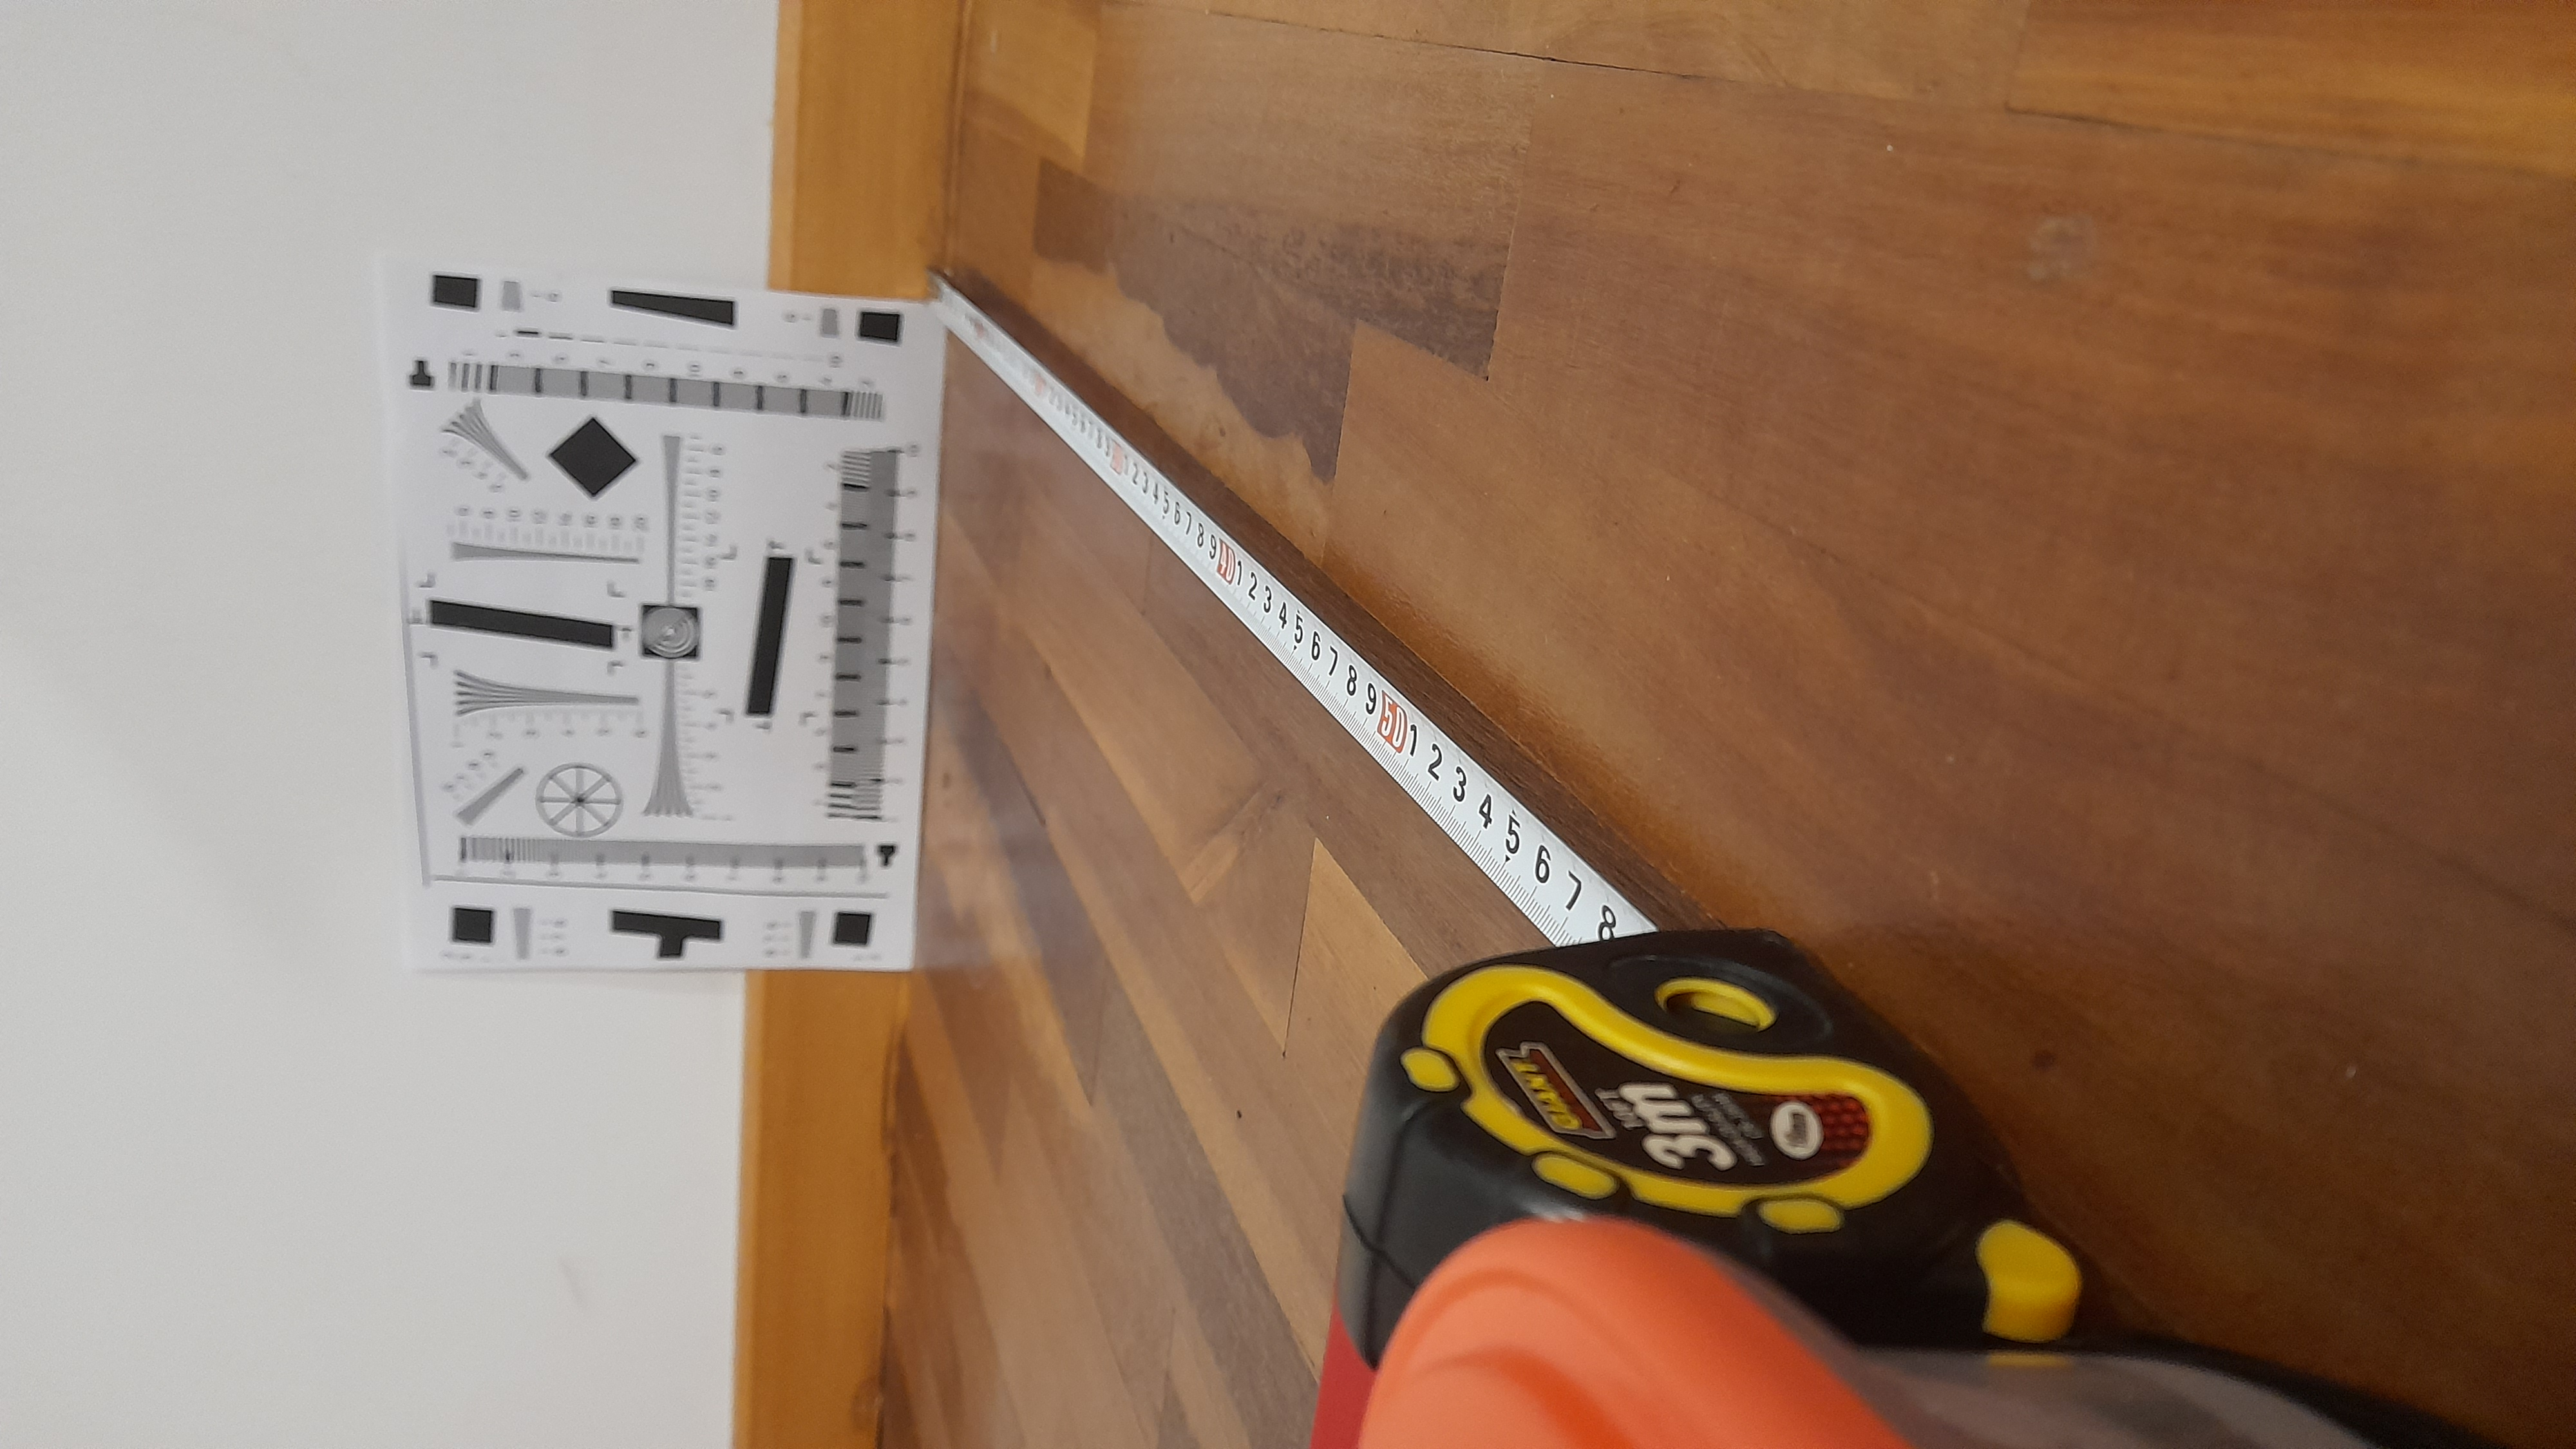

In [68]:
from IPython.display import Image
Image(filename='assets/20240814_005947.jpg')

### Cámara fija

Vemos hasta la franja N°7, es decir, hasta las de aproximadamente 0.2 mm

Esto implica, habiendo impreso una hoja de 210 mm \* 297 mm:

210 mm \* 297 mm / (0.2 mm)^2 = 1559250 pixel = 1.55925 Mpixel

Como la fotografía mide 3408 px \* 1916 px, pero la hoja fotografiada ocupa 1237 px \* 789 px 

(1237 px \* 789 px) / (3408 px \* 1916 px) = 0.1495

=> la hoja fotografiada ocupa un 25.63% de la fotografía

Por lo que nos queda:

resolucion = 1.55925 Mpixel / 0.1493 = 10.44 Mpixeles ~= 11 Mpixeles

Valor real: 13 Mpixeles https://en.wikipedia.org/wiki/Samsung_Galaxy_A21s 

### Cámara a mano alzada

Vemos hasta la franja N°6, es decir, hasta las de aproximadamente 0.25 mm

Esto implica, habiendo impreso una hoja de 210 mm \* 297 mm:

210 mm \* 297 mm / (0.25 mm)^2 = 997920 pixel = 0.99792 Mpixel

Como la fotografía mide 3408 px \* 1916 px, pero la hoja fotografiada ocupa 1205 px \* 757 px 

(1205 px \* 757 px) / (3408 px \* 1916 px) = 0.1397

=> la hoja fotografiada ocupa un 13.97% de la fotografía

Por lo que nos queda:

resolucion = 0.99792 Mpixel / 0.1397 = 7.1433 Mpixeles ~= 7 Mpixeles

Valor real: 13 Mpixeles https://en.wikipedia.org/wiki/Samsung_Galaxy_A21s 

Da entonces un mejor resultado la cámara fija.

## Ejercicio 4
**Generar en Matlab dos imágenes de 9 pixeles x 9 pixeles. En ambos casos el pixel central debe tener un valor de 127. Los pixeles vecinos deben tener un valor de 63, y 223 en cada caso.**

**La luminancia del pixel central es la misma en cada caso, pero perceptualmente no poseen el mismo brillo. Variar la luminancia del pixel central de una de las imágenes, hasta que perceptualmente ambas posean el mismo brillo. ¿Qué valor se obtiene? Probar con diferentes valores para los pixeles externos. Extraer conclusiones.**

In [69]:
import matplotlib.pyplot as plt
from PIL import Image

In [70]:
def horizontal_join_images(left_image: Image.Image, right_image: Image.Image) -> Image.Image:
    joined = Image.new(mode="L", size=(left_image.width + right_image.width, max(left_image.height, right_image.height)))
    joined.paste(left_image, (0, 0))
    joined.paste(right_image, (left_image.width, 0))
    return joined

In [71]:
LIGHT_SQUARE_COLOR = 223
DARK_SQUARE_COLOR = 63
SQUARE_SIZE = (9, 9)

PIXEL_COLOR = 127
PIXEL_SIZE = (3, 3)

In [72]:
def build_image(left_delta: int, right_delta: int) -> Image.Image:
    inside_square_left = Image.new(mode="L", size=PIXEL_SIZE, color=PIXEL_COLOR + left_delta)
    inside_square_right = Image.new(mode="L", size=PIXEL_SIZE, color=PIXEL_COLOR + right_delta)

    left_square = Image.new(mode="L", size=SQUARE_SIZE, color=DARK_SQUARE_COLOR)
    right_square = Image.new(mode="L", size=SQUARE_SIZE, color=LIGHT_SQUARE_COLOR)

    left_square.paste(inside_square_left, (3, 3))
    right_square.paste(inside_square_right, (3, 3))

    joined_squares = horizontal_join_images(left_square, right_square)
    return joined_squares

In [73]:
def show_image(img: Image.Image) -> None:
    plt.imshow(img, cmap="gray", vmin=0, vmax=255)

### Imagen sin variación

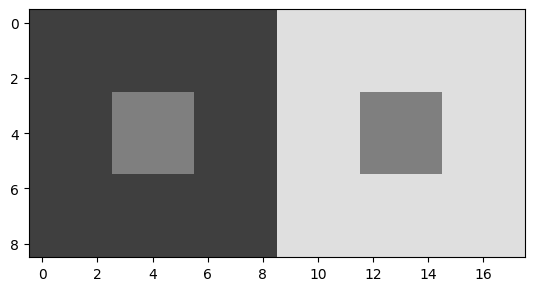

In [74]:
show_image(build_image(0, 0))

### Variación de la luminancia del pixel central de la imagen de la derecha

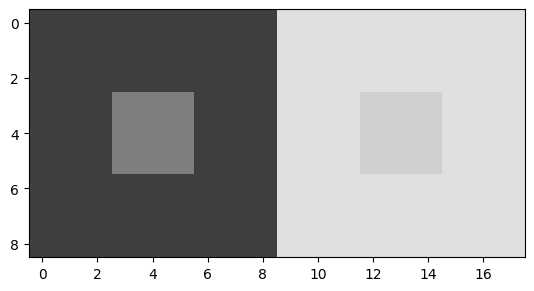

In [75]:
show_image(build_image(0, 80))

### Variación de la luminancia del pixel central de la imágen de la izquierda

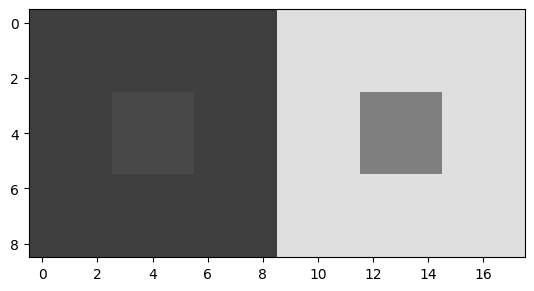

In [76]:
show_image(build_image(-55, 0))

### Conclusiones

* Al percibir la imagen original con el ojo humano, pese a tener la misma luminancia en el pixel central de ambas imágenes, aparenta más oscuro (menor luminancia) el de la derecha.

* Variar el pixel central de la imagen derecha o el de la izquierda no es lo mismo. Variarla en el de la derecha tiene mayor impacto a menor variación comparado con la de la izquierda.

## Ejercicio 5
**Charles Darwin Was Right!!! Se desea decimar la imagen “mono.bmp” que se encuentra en el sitio de la materia. Para ello, se pide:**

**a) Dividir la imagen en bloques de 4x4 pixeles, y quedarse con el pixel en la posición (2,2).**

**b) Repetir la decimación tomando el pixel en la posición (1,1).**

**c) Repetir tomando el promedio de los 16 puntos.**

**d) Interpolar las imágenes obtenidas en los tres puntos anteriores para obtener una imagen de la resolución original utilizando interpolación bilineal y bicubica.**

**Implementar las interpolaciones a mano. Graficar el espectro de la imagen original. Obtener conclusiones.**

### Carga de imagen

In [77]:
# ! pip install opencv-python

In [78]:
from PIL import Image
from typing import Callable
from pathlib import Path
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [79]:
ASSETS_FOLDER_PATH = "./assets"
OUTPUT_FOLDER_PATH = "./ex5"

In [80]:
Path(OUTPUT_FOLDER_PATH).mkdir(parents=True, exist_ok=True)

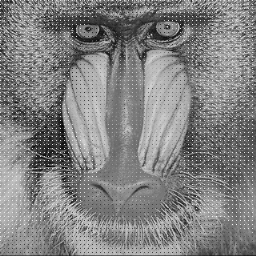

In [81]:
im = Image.open(f"{ASSETS_FOLDER_PATH}/mono.bmp")
im

### Funciones para descomponer y recomponer imágenes en bloques

In [82]:
def blockify(image: Image.Image, block_size: int) -> list[list[Image.Image]]:
    if image.height % block_size != 0 or image.height % block_size != 0:
        raise ValueError('image is not divisible by block_size')

    block_mat: list[list[Image.Image]] = []

    n_rows = int(image.height / block_size)
    n_cols = int(image.width / block_size)

    for n_row in range(n_rows):
        block_mat.append([])

        for n_col in range(n_cols):
            curr_left_pixel_pos = n_col * block_size
            curr_top_pixel_pos = n_row * block_size

            next_left_pixel_pos = ((n_col+1) * block_size)
            next_top_pixel_pos = ((n_row+1) * block_size)

            curr_right_pixel_pos = next_left_pixel_pos
            curr_bottom_pixel_pos = next_top_pixel_pos

            block = image.crop((
                curr_left_pixel_pos, 
                curr_top_pixel_pos,
                curr_right_pixel_pos,
                curr_bottom_pixel_pos
            ))

            block_mat[n_row].append(block)
            
    return block_mat

In [83]:
def deblockify(block_mat: list[list[Image.Image]], mode: str) -> Image.Image:
    n_rows = len(block_mat)
    n_cols = len(block_mat[0])

    block_width = block_mat[0][0].width
    block_height = block_mat[0][0].height

    width = block_width * n_cols
    height = block_height * n_rows

    image = Image.new(mode, size=(width, height))

    curr_left_pixel = 0
    curr_top_pixel = 0
    for n_row in range(n_rows):
        next_top_pixel = curr_top_pixel + block_height
        curr_bottom_pixel = next_top_pixel

        for n_col in range(n_cols):
            block = block_mat[n_row][n_col]
            
            next_left_pixel = curr_left_pixel + block_width
            curr_right_pixel = next_left_pixel

            image.paste(block, (curr_left_pixel, curr_top_pixel, curr_right_pixel, curr_bottom_pixel))
            
            curr_left_pixel = next_left_pixel
        
        curr_top_pixel = next_top_pixel
        curr_left_pixel = 0
            
    return image

### Chequeo de idempotencia

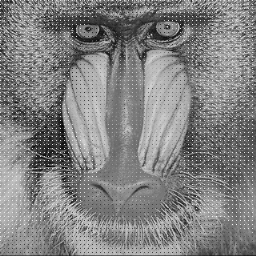

In [84]:
deblockify(blockify(im, 4), im.mode)

### Funciones para decimación

In [85]:
def decimate(image: Image.Image, block_size: int, decimation_strategy: Callable[[Image.Image], Image.Image]) -> Image.Image:
    block_mat = blockify(image, block_size)

    decimated_block_mat: list[list[Image.Image]] = []
    for n_row in range(len(block_mat)):
        decimated_block_mat.append([])
        
        for n_col in range(len(block_mat[n_row])):
            block = block_mat[n_row][n_col]
            decimated_block = decimation_strategy(block)

            decimated_block_mat[n_row].append(decimated_block)

    image = deblockify(decimated_block_mat, image.mode)
    
    return image

In [86]:
def interpolate(image: Image.Image, interpolation_strategy: Callable[[], Image.Image]) -> Image.Image:
    block_mat = blockify(image, 2)

    interpolated_block_mat: list[list[Image.Image]] = []
    for n_row in range(len(block_mat)):
        interpolated_block_mat.append([])
        
        for n_col in range(len(block_mat[n_row])):
            block = block_mat[n_row][n_col]
            interpolated_block = interpolation_strategy(block)

            interpolated_block_mat[n_row].append(interpolated_block)

    image = deblockify(interpolated_block_mat, mode=image.mode)
    return image

### Estrategias de decimación

In [87]:
def pixel_picker_block_decimation(picked_pixel: tuple[int, int], block: Image.Image) -> Image.Image:
    curr_left = picked_pixel[1]
    curr_top = picked_pixel[0]
    curr_right = curr_left+1
    curr_bottom = curr_top+1
    
    decimated_block = block.crop((
        curr_left,
        curr_top,
        curr_right,
        curr_bottom
    ))

    return decimated_block

In [88]:
def avg_pixel_block_decimation(block: Image.Image) -> Image.Image:
    if block.mode != "L":
        raise ValueError('image must be in L mode to perform this decimation strategy')
    
    n_pixels = block.width * block.height
    sum_pixels = 0

    pixels = block.load()
    for x_pos in range(block.width):
        for y_pos in range(block.height):
            sum_pixels += pixels[x_pos, y_pos]

    avg_pixels = int(sum_pixels / n_pixels)

    return Image.new(mode=block.mode, size=(1, 1), color=avg_pixels)

In [89]:
def bilinear_block_interpolation(block: Image.Image) -> Image.Image:
    block_size = 8
    if block_size < block.width or block_size < block.height:
        raise ValueError('cannot interpolate smaller image')
    
    pixels = block.load()
    
    interpolated_block = Image.new(mode=block.mode, size=(block_size, block_size))
    interpolated_pixels = interpolated_block.load()

    block_size / block.width
    
    interpolated_pixels[0, 0] = pixels[0, 0]
    interpolated_pixels[block_size-1, 0] = pixels[1, 0]

    interpolated_pixels[0, block_size-1] = pixels[0, 1]
    interpolated_pixels[block_size-1, block_size-1] = pixels[1, 1]

    for x_offset in range(1, block_size-1):
        tx = 1 / x_offset

        qx1 = tx
        qx2 = 1 - tx

        interpolated_pixels[x_offset, 0] = int(interpolated_pixels[0, 0]*qx1 + interpolated_pixels[block_size-1, 0]*qx2)
        interpolated_pixels[x_offset, block_size-1] = int(interpolated_pixels[0, block_size-1]*qx1 + interpolated_pixels[block_size-1, block_size-1]*qx2)

    for y_offset in range(1, block_size-1):
        ty = 1 / y_offset

        qy1 = ty
        qy2 = 1 - ty

        for x_offset in range(0, block_size):
            interpolated_pixels[x_offset, y_offset] = int(interpolated_pixels[x_offset, 0]*qy1 + interpolated_pixels[x_offset, block_size-1]*qy2)

    return interpolated_block

### Experimentos a, b, c

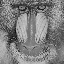

In [90]:
a = decimate(im, 4, lambda block: pixel_picker_block_decimation((1, 1), block))
a.save(f"{OUTPUT_FOLDER_PATH}/a.bmp")
a

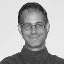

In [91]:
b = decimate(im, 4, lambda block: pixel_picker_block_decimation((0, 0), block))
b.save(f"{OUTPUT_FOLDER_PATH}/b.bmp")
b

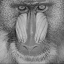

In [92]:
c = decimate(im, 4, avg_pixel_block_decimation)
c.save(f"{OUTPUT_FOLDER_PATH}/c.bmp")
c

### Experimento d

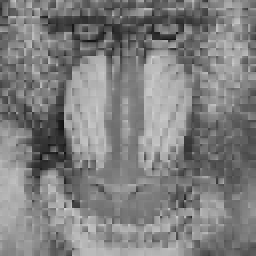

In [93]:
d1a = interpolate(a, bilinear_block_interpolation)
d1a.save(f"{OUTPUT_FOLDER_PATH}/d1a.bmp")
d1a

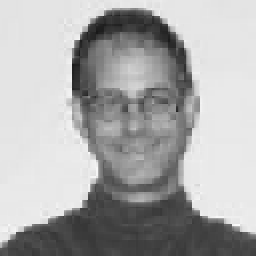

In [94]:
d1b = interpolate(b, bilinear_block_interpolation)
d1b.save(f"{OUTPUT_FOLDER_PATH}/d1b.bmp")
d1b

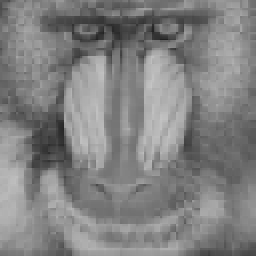

In [95]:
d1c = interpolate(c, bilinear_block_interpolation)
d1c.save(f"{OUTPUT_FOLDER_PATH}/d1c.bmp")
d1c

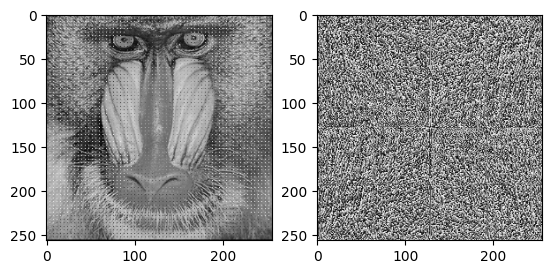

In [96]:
im =cv2.imread(f"{ASSETS_FOLDER_PATH}/mono.bmp")
im = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
dft = np.fft.fft2(im)
dft_shift = np.fft.fftshift(dft)
phase_spectrum = np.angle(dft_shift)

ax1 = plt.subplot(1,2,1)
ax1.imshow(im, cmap='gray')

ax2 = plt.subplot(1,2,2)
ax2.imshow(phase_spectrum, cmap='gray')

plt.show()

### Conclusiones

- A la hora de reducir el tamaño, es mejor usar un pixel especifico
- El decimar y luego interpolar conlleva una cierta pérdida de información respecto a la original